In [86]:
from torch.nn import Module
from torch import rand,empty,Tensor
from torch.nn import Parameter
class SVD(Module):
        def __init__(self, r,X):
            super().__init__()
            self.r=r
            self.U = Parameter(empty((X.shape[0], r)).normal_(),requires_grad = True)
            self.Sig =Parameter(empty((r, r)).normal_(),requires_grad = True)
            self.V = Parameter(empty((X.shape[1],r)).normal_(),requires_grad = True)
            
        def forward(self):
            return self.U.mm(self.Sig).mm(self.V.t()) 



In [87]:
import torch
def Loss(X,U,V,Sig):
    return (X - U.mm(Sig).mm(V.t())).norm()  + (U.mm(U.t()) -torch.eye(U.shape[0])).norm() +  (V.mm(V.t()) -torch.eye(V.shape[0])).norm() + (Sig.mm(Sig).mm(torch.ones(Sig.shape[0])-torch.eye(Sig.shape[0]))).norm()

tensor([[29., 29., 29.,  ..., 29., 29., 29.],
        [29., 29., 29.,  ..., 29., 29., 29.],
        [29., 29., 29.,  ..., 29., 29., 29.],
        ...,
        [ 3.,  4.,  5.,  ...,  6.,  6.,  5.],
        [ 3.,  3.,  4.,  ...,  6.,  6.,  5.],
        [ 3.,  4.,  5.,  ...,  6.,  6.,  5.]])
torch.Size([267, 267])


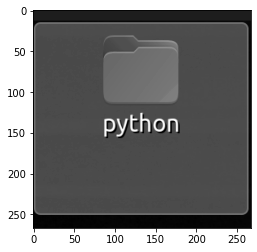

In [95]:
from PIL import Image
import matplotlib.pyplot as plt
img= Image.open("2.png")#.convert('L')
img.load()
img = Tensor(np.array(img))
print(img)
print(img.shape)
plt.imshow(img, cmap = 'gray')

20/0)24498.505859375
20/1)24459.7578125
20/2)24422.98828125
20/3)24388.12890625
20/4)24355.02734375
20/5)24323.533203125
20/6)24293.71484375
20/7)24265.380859375
20/8)24238.49609375
20/9)24212.984375
20/10)24188.73828125
20/11)24165.736328125
20/12)24143.921875
20/13)24123.19140625
20/14)24103.48828125
20/15)24084.732421875
20/16)24066.927734375
20/17)24049.982421875
20/18)24033.8046875
20/19)24018.3671875
20/20)24003.58203125
20/21)23989.421875
20/22)23975.853515625
20/23)23962.80859375
20/24)23950.2890625
20/25)23938.12890625
20/26)23926.40625
20/27)23915.044921875
20/28)23904.0078125
20/29)23893.33203125
20/30)23882.919921875
20/31)23872.787109375
20/32)23862.87890625
20/33)23853.197265625
20/34)23843.783203125
20/35)23834.5078125
20/36)23825.453125
20/37)23816.52734375
20/38)23807.822265625
20/39)23799.1953125
20/40)23790.73046875
20/41)23782.41796875
20/42)23774.20703125
20/43)23766.142578125
20/44)23758.18359375
20/45)23750.318359375
20/46)23742.54296875
20/47)23734.884765625
20/

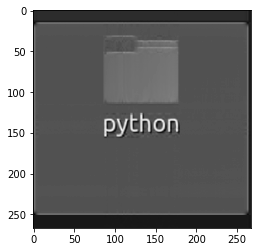

In [102]:
from torch.optim import SGD

for i in range(1,26):
    svd = SVD(i,img)
    opt = SGD(svd.parameters(), 0.001)
    n_epoch = 10000
    for epoch in range(n_epoch):
        opt.zero_grad()
        loss = Loss(img, svd.U, svd.V, svd.Sig )
        print(f"{i}/{epoch}){loss}")
        #img_new = svd.U.mm(svd.Sig).mm(svd.V.t())
        #print(img_new)
        loss.backward()
        opt.step()
    img_new = svd.U.mm(svd.Sig).mm(svd.V.t())
    #plt.imshow(img_new.detach().numpy(), cmap = 'gray')
    plt.savefig(f'images/{i}_image.png')
    
    
    


tensor(238)


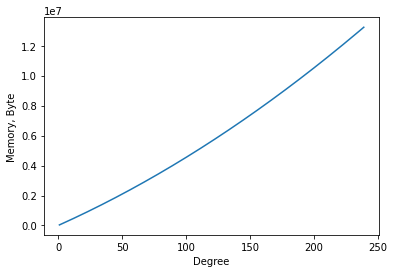

In [131]:
import numpy as np
import sys

rank = torch.matrix_rank(img)
print(f'rank - {rank}')

sizes = []
for i in range(1,rank+1):
    svd = SVD(i,img)
    size_U = svd.U.shape[0]*svd.U.shape[1]*sys.getsizeof(svd.U[0,0])
    size_Sig = svd.Sig.shape[0]*svd.Sig.shape[1]*sys.getsizeof(svd.Sig[0,0])
    size_V = svd.V.shape[0]*svd.V.shape[1]*sys.getsizeof(svd.V[0,0])
    sizes.append(size_U+size_Sig+size_V)
indexes = np.linspace(1,rank+1,rank)
plt.xlabel('Degree')
plt.ylabel('Memory, Byte')
plt.plot(indexes,sizes)


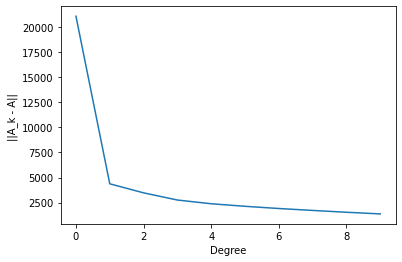

In [148]:
from numpy.linalg import norm
from numpy.linalg import svd

U,Sig,V =svd(img) 
Sig = np.diag(Sig)

norm_list = []
k_list = range(10)
for k in k_list:
    A_k = np.dot(np.dot(U[:,:k],Sig[:k,:k]),V[:k,:])
    norm_list.append(norm(img - A_k))

plt.xlabel('Degree')
plt.ylabel('||A_k - A|| ')
plt.plot(k_list,norm_list)